# Practical 3
23AIML056 Kavya

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.metrics import *

import warnings
warnings.filterwarnings("ignore")

## Data importing

In [2]:
df = pd.read_csv("Datasets\\Player.csv")
df.head()

Unnamed: 0  AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  \
0     -Andy Allanson    293    66      1    30   29     14      1     293   
1        -Alan Ashby    315    81      7    24   38     39     14    3449   
2       -Alvin Davis    479   130     18    66   72     76      3    1624   
3      -Andre Dawson    496   141     20    65   78     37     11    5628   
4  -Andres Galarraga    321    87     10    39   42     30      2     396   

   CHits  ...  CRuns  CRBI  CWalks  League Division PutOuts  Assists  Errors  \
0     66  ...     30    29      14       A        E     446       33      20   
1    835  ...    321   414     375       N        W     632       43      10   
2    457  ...    224   266     263       A        W     880       82      14   
3   1575  ...    828   838     354       N        E     200       11       3   
4    101  ...     48    46      33       N        E     805       40       4   

   Salary  NewLeague  
0     NaN          A  
1   475.0          N  
2   480.0          A  
3   500.0          N  
4    91.5          N  

[5 rows x 21 columns]

In [3]:
df.shape

(322, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  322 non-null    object 
 1   AtBat       322 non-null    int64  
 2   Hits        322 non-null    int64  
 3   HmRun       322 non-null    int64  
 4   Runs        322 non-null    int64  
 5   RBI         322 non-null    int64  
 6   Walks       322 non-null    int64  
 7   Years       322 non-null    int64  
 8   CAtBat      322 non-null    int64  
 9   CHits       322 non-null    int64  
 10  CHmRun      322 non-null    int64  
 11  CRuns       322 non-null    int64  
 12  CRBI        322 non-null    int64  
 13  CWalks      322 non-null    int64  
 14  League      322 non-null    object 
 15  Division    322 non-null    object 
 16  PutOuts     322 non-null    int64  
 17  Assists     322 non-null    int64  
 18  Errors      322 non-null    int64  
 19  Salary      263 non-null    f

## Impude null values

In [5]:
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = df.select_dtypes(include=["object"]).columns
print(f"numerical cols: {numerical_cols}")
print(f"categorical cols: {categorical_cols}")

numerical cols: Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors', 'Salary'],
      dtype='object')
categorical cols: Index(['Unnamed: 0', 'League', 'Division', 'NewLeague'], dtype='object')


In [6]:
for col in numerical_cols:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  322 non-null    object 
 1   AtBat       322 non-null    int64  
 2   Hits        322 non-null    int64  
 3   HmRun       322 non-null    int64  
 4   Runs        322 non-null    int64  
 5   RBI         322 non-null    int64  
 6   Walks       322 non-null    int64  
 7   Years       322 non-null    int64  
 8   CAtBat      322 non-null    int64  
 9   CHits       322 non-null    int64  
 10  CHmRun      322 non-null    int64  
 11  CRuns       322 non-null    int64  
 12  CRBI        322 non-null    int64  
 13  CWalks      322 non-null    int64  
 14  League      322 non-null    object 
 15  Division    322 non-null    object 
 16  PutOuts     322 non-null    int64  
 17  Assists     322 non-null    int64  
 18  Errors      322 non-null    int64  
 19  Salary      322 non-null    f

In [7]:
df.head()

Unnamed: 0  AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  \
0     -Andy Allanson    293    66      1    30   29     14      1     293   
1        -Alan Ashby    315    81      7    24   38     39     14    3449   
2       -Alvin Davis    479   130     18    66   72     76      3    1624   
3      -Andre Dawson    496   141     20    65   78     37     11    5628   
4  -Andres Galarraga    321    87     10    39   42     30      2     396   

   CHits  ...  CRuns  CRBI  CWalks  League Division PutOuts  Assists  Errors  \
0     66  ...     30    29      14       A        E     446       33      20   
1    835  ...    321   414     375       N        W     632       43      10   
2    457  ...    224   266     263       A        W     880       82      14   
3   1575  ...    828   838     354       N        E     200       11       3   
4    101  ...     48    46      33       N        E     805       40       4   

   Salary  NewLeague  
0   425.0          A  
1   475.0          N  
2   480.0          A  
3   500.0          N  
4    91.5          N  

[5 rows x 21 columns]

## Statistics of our data

In [8]:
df.describe()

AtBat        Hits       HmRun        Runs         RBI       Walks  \
count  322.000000  322.000000  322.000000  322.000000  322.000000  322.000000   
mean   380.928571  101.024845   10.770186   50.909938   48.027950   38.742236   
std    153.404981   46.454741    8.709037   26.024095   26.166895   21.639327   
min     16.000000    1.000000    0.000000    0.000000    0.000000    0.000000   
25%    255.250000   64.000000    4.000000   30.250000   28.000000   22.000000   
50%    379.500000   96.000000    8.000000   48.000000   44.000000   35.000000   
75%    512.000000  137.000000   16.000000   69.000000   64.750000   53.000000   
max    687.000000  238.000000   40.000000  130.000000  121.000000  105.000000   

            Years       CAtBat        CHits      CHmRun        CRuns  \
count  322.000000    322.00000   322.000000  322.000000   322.000000   
mean     7.444099   2648.68323   717.571429   69.490683   358.795031   
std      4.926087   2324.20587   654.472627   86.266061   334.105886   
min      1.000000     19.00000     4.000000    0.000000     1.000000   
25%      4.000000    816.75000   209.000000   14.000000   100.250000   
50%      6.000000   1928.00000   508.000000   37.500000   247.000000   
75%     11.000000   3924.25000  1059.250000   90.000000   526.250000   
max     24.000000  14053.00000  4256.000000  548.000000  2165.000000   

              CRBI       CWalks      PutOuts     Assists      Errors  \
count   322.000000   322.000000   322.000000  322.000000  322.000000   
mean    330.118012   260.239130   288.937888  106.913043    8.040373   
std     333.219617   267.058085   280.704614  136.854876    6.368359   
min       0.000000     0.000000     0.000000    0.000000    0.000000   
25%      88.750000    67.250000   109.250000    7.000000    3.000000   
50%     220.500000   170.500000   212.000000   39.500000    6.000000   
75%     426.250000   339.250000   325.000000  166.000000   11.000000   
max    1659.000000  1566.000000  1378.000000  492.000000   32.000000   

            Salary  
count   322.000000  
mean    515.600953  
std     409.817459  
min      67.500000  
25%     226.250000  
50%     425.000000  
75%     700.000000  
max    2460.000000

## Visualisation

In [9]:
def plot_df(df: pd.DataFrame):
    num_cols = df.select_dtypes(include=["int64", "float64"]).columns
    cat_cols = df.select_dtypes(include=["object"]).columns

    # ---------- CATEGORICAL ----------
    if len(cat_cols) > 0:
        n_cols = 3
        n_rows = math.ceil(len(cat_cols) / n_cols)

        plt.figure(figsize=(n_cols * 5, n_rows * 5))

        for i, col in enumerate(cat_cols, 1):
            plt.subplot(n_rows, n_cols, i)

            values = df[col].value_counts()
            top = values.head(5)

            if len(values) > 5:
                top["Others"] = values[5:].sum()

            plt.pie(top, labels=top.index, autopct="%1.1f%%", startangle=90)
            plt.title(f"Pie Chart - {col}")

        plt.suptitle("Categorical Columns - Pie Chart", y=1.02)
        plt.tight_layout()
        plt.show()

    # ---------- NUMERICAL BOXPLOTS ----------
    if len(num_cols) > 0:
        n_cols = 3
        n_rows = math.ceil(len(num_cols) / n_cols)

        plt.figure(figsize=(n_cols * 5, n_rows * 5))

        for i, col in enumerate(num_cols, 1):
            plt.subplot(n_rows, n_cols, i)
            sns.boxplot(x=df[col])
            plt.title(f"Boxplot - {col}")

        plt.suptitle("Numerical Columns - Boxplot", y=1.02)
        plt.tight_layout()
        plt.show()

        # ---------- HISTOGRAMS ----------
        plt.figure(figsize=(n_cols * 5, n_rows * 5))

        for i, col in enumerate(num_cols, 1):
            plt.subplot(n_rows, n_cols, i)
            sns.histplot(df[col].dropna(), kde=True, bins=30)
            plt.axvline(df[col].mean(), linestyle="dashed", linewidth=1)
            plt.title(f"Histplot - {col}")
            plt.xlabel(col)
            plt.ylabel("Frequency")

        plt.suptitle("Numerical Columns - Histplot", y=1.02)
        plt.tight_layout()
        plt.show()

    # ---------- PAIRPLOT ----------
    if len(num_cols) > 1:
        pair = sns.pairplot(df[num_cols].dropna())
        pair.figure.suptitle("Numerical Columns - Pairplot", y=1.02)
        plt.figure(figsize=(40, 30))
        plt.show()

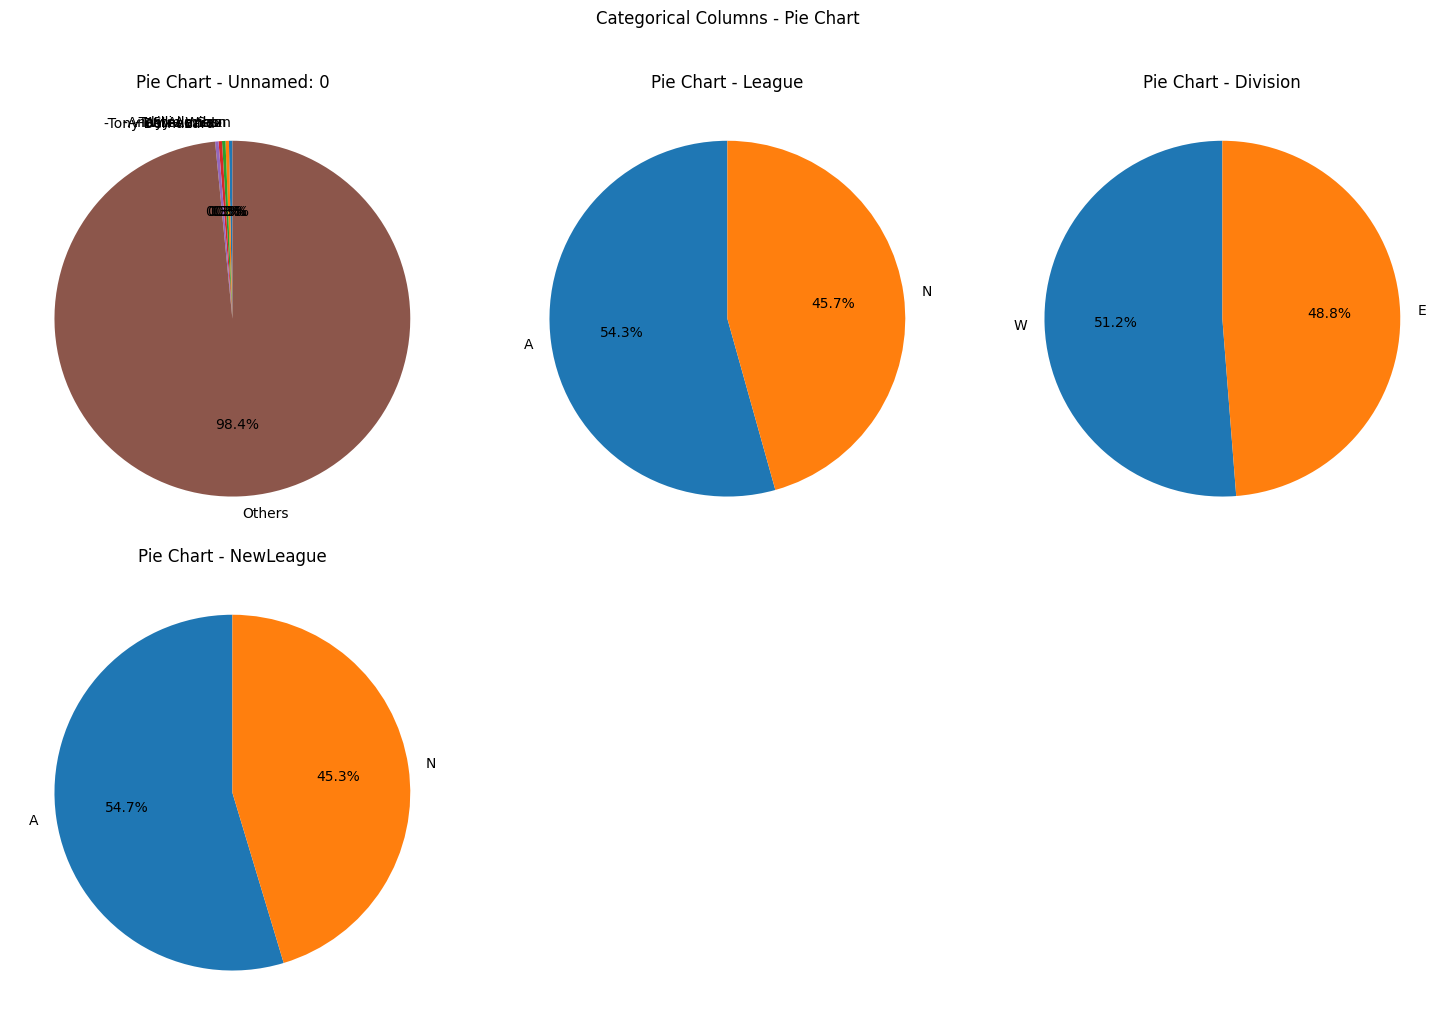

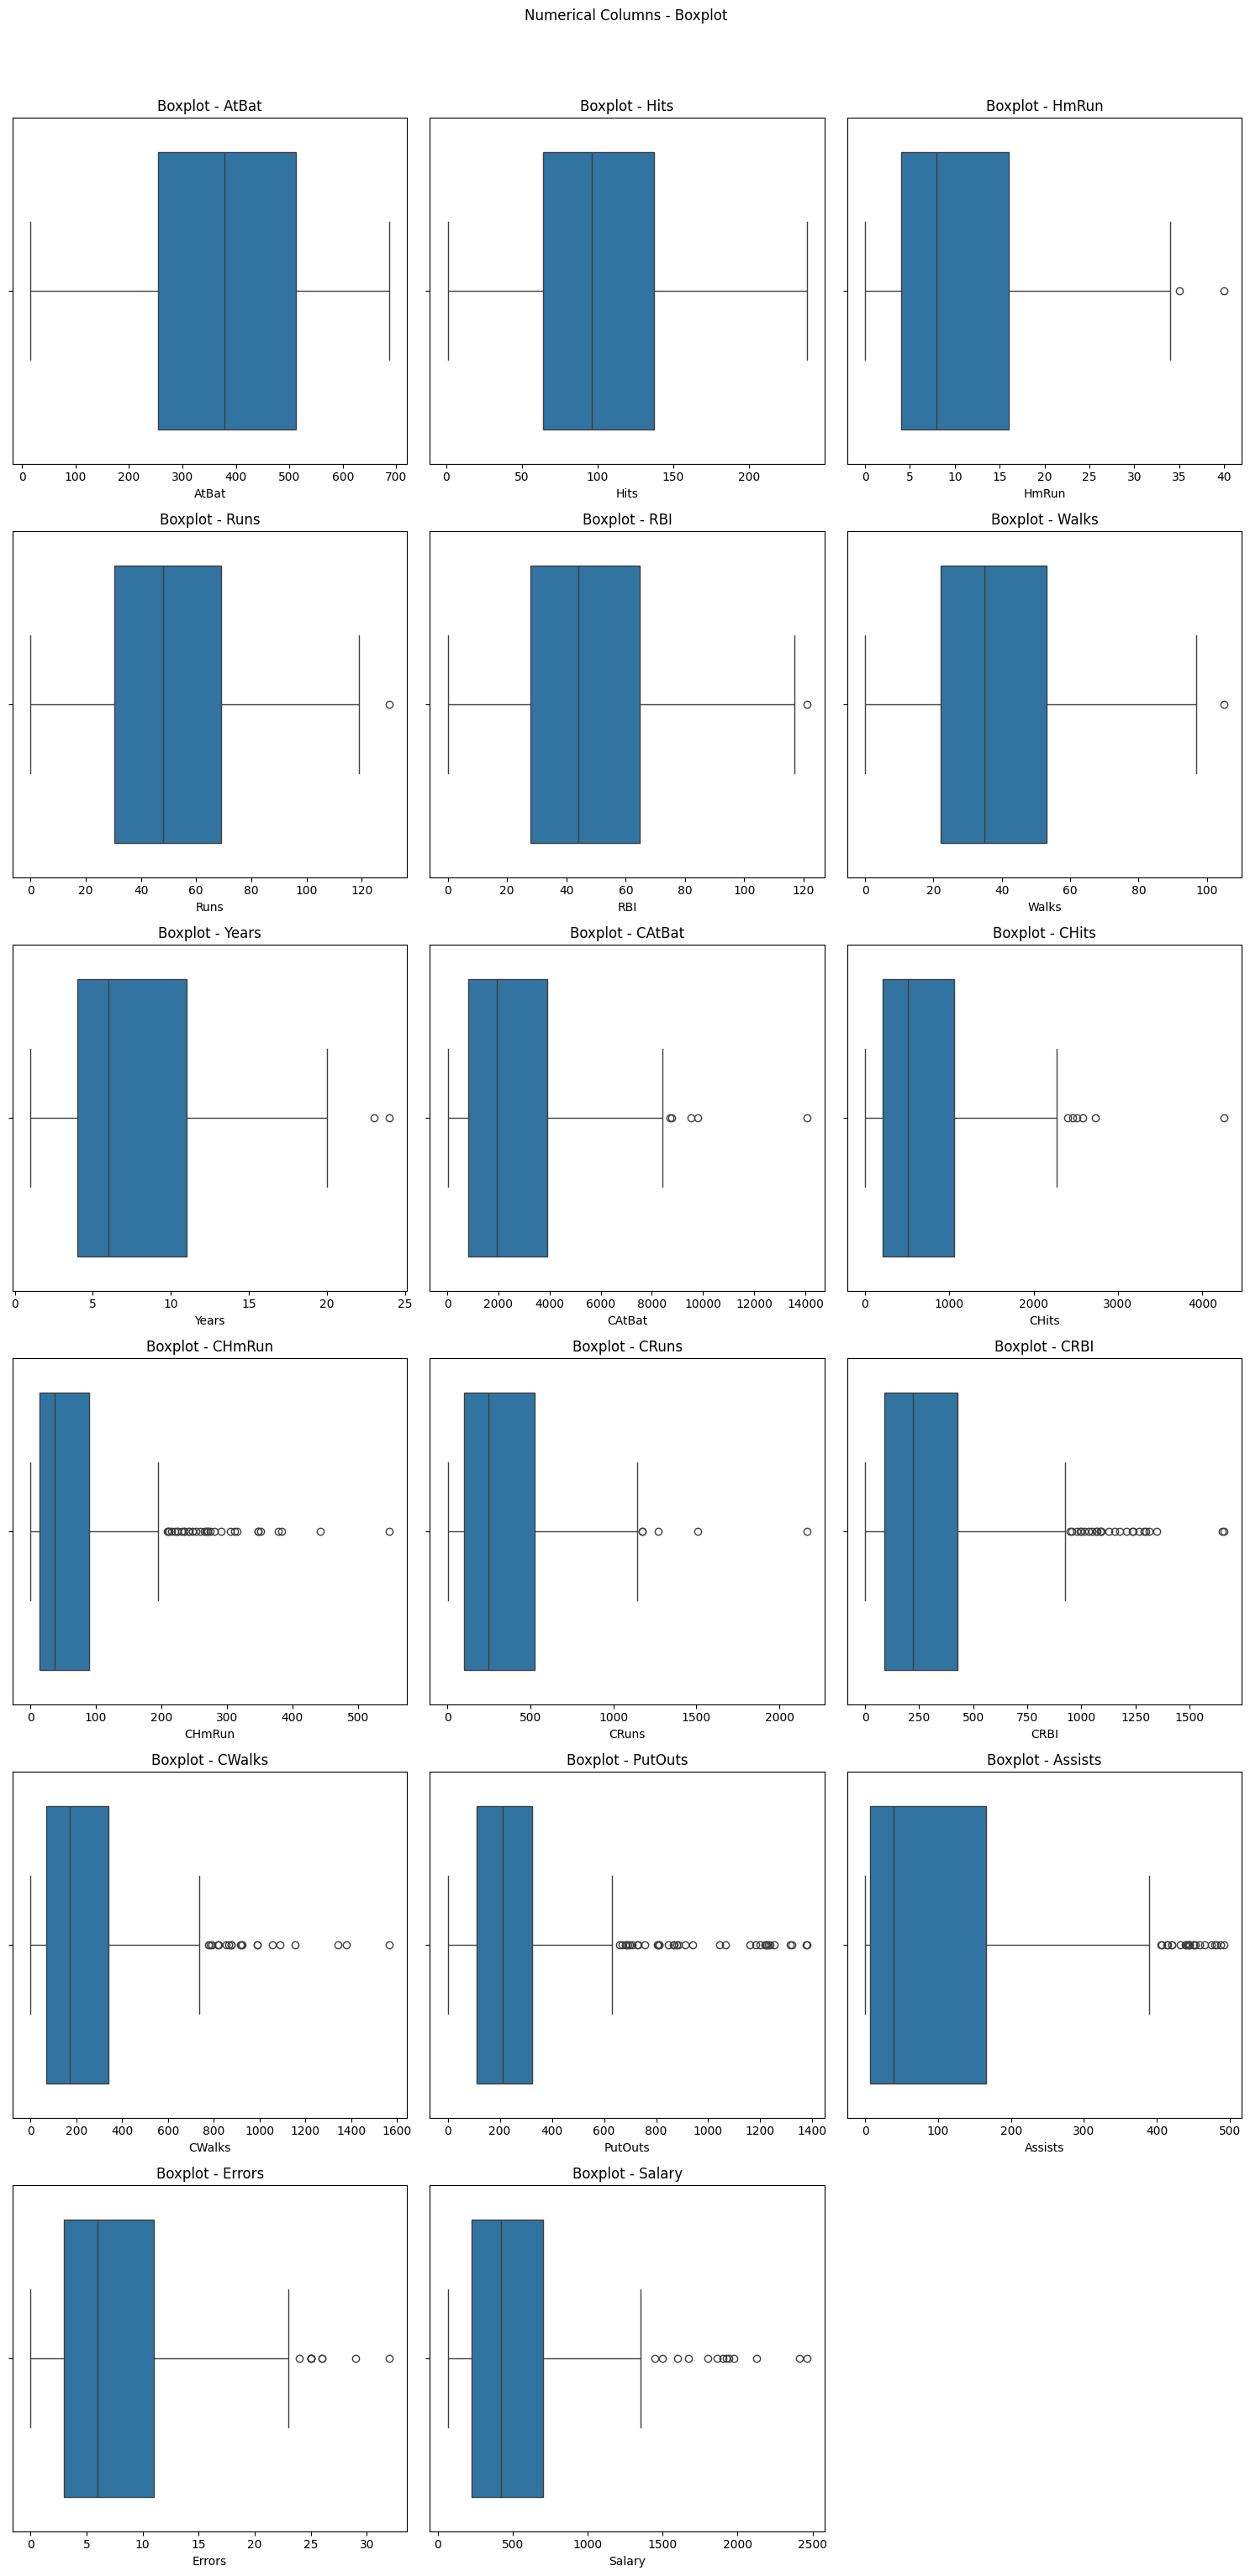

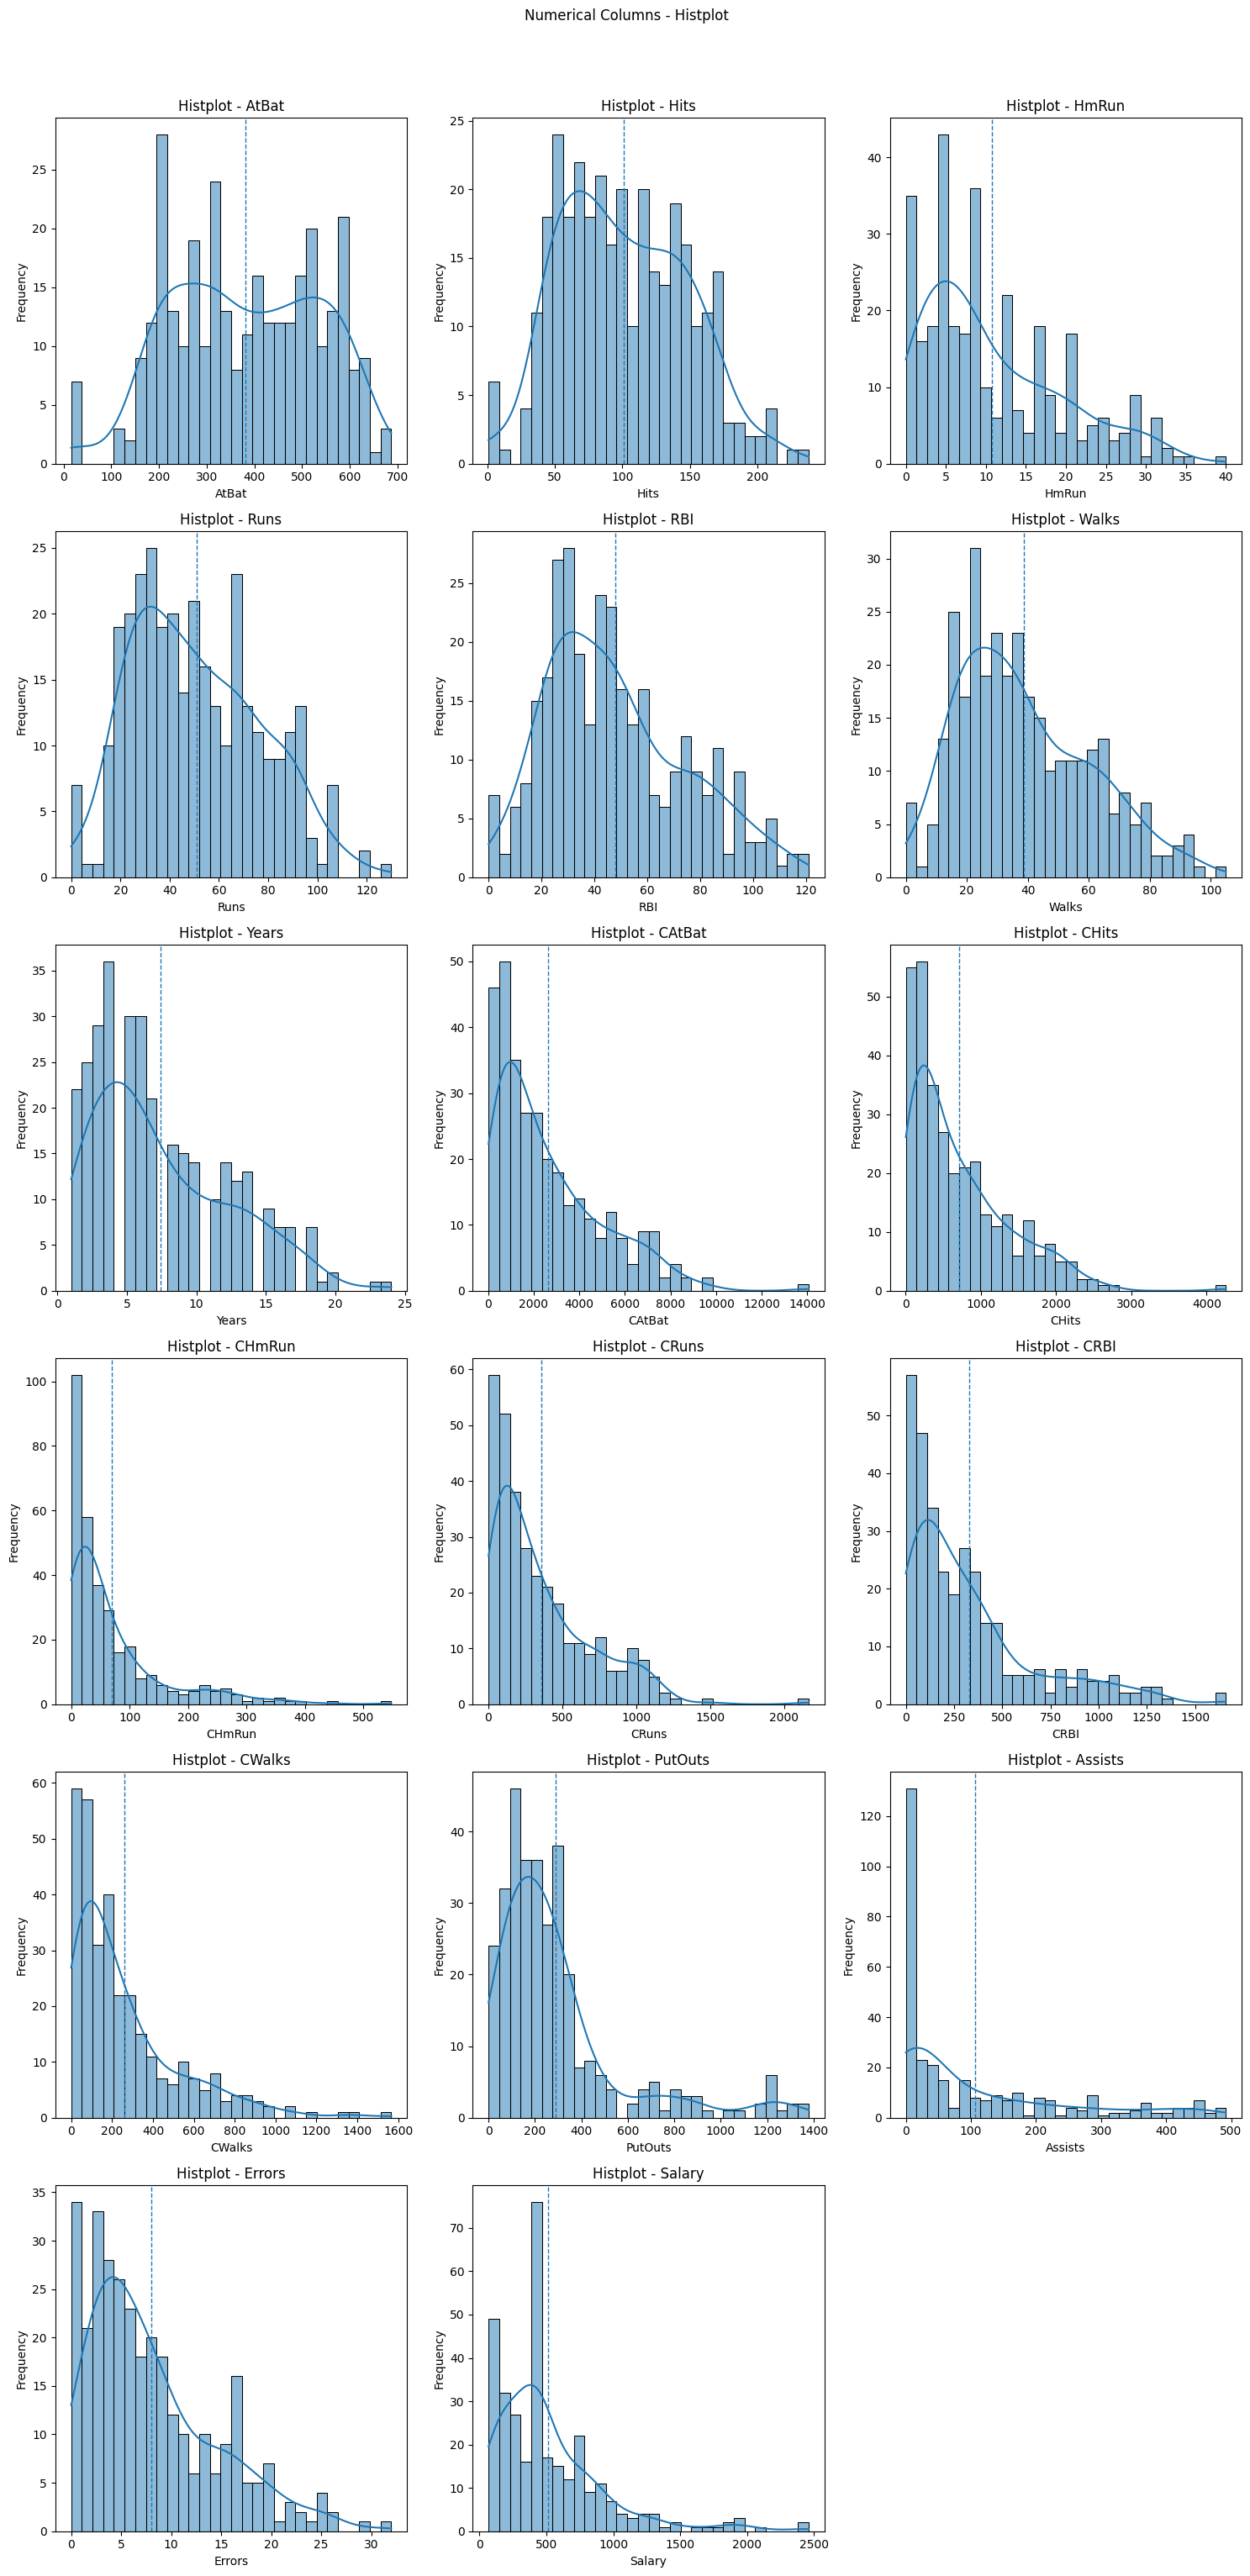

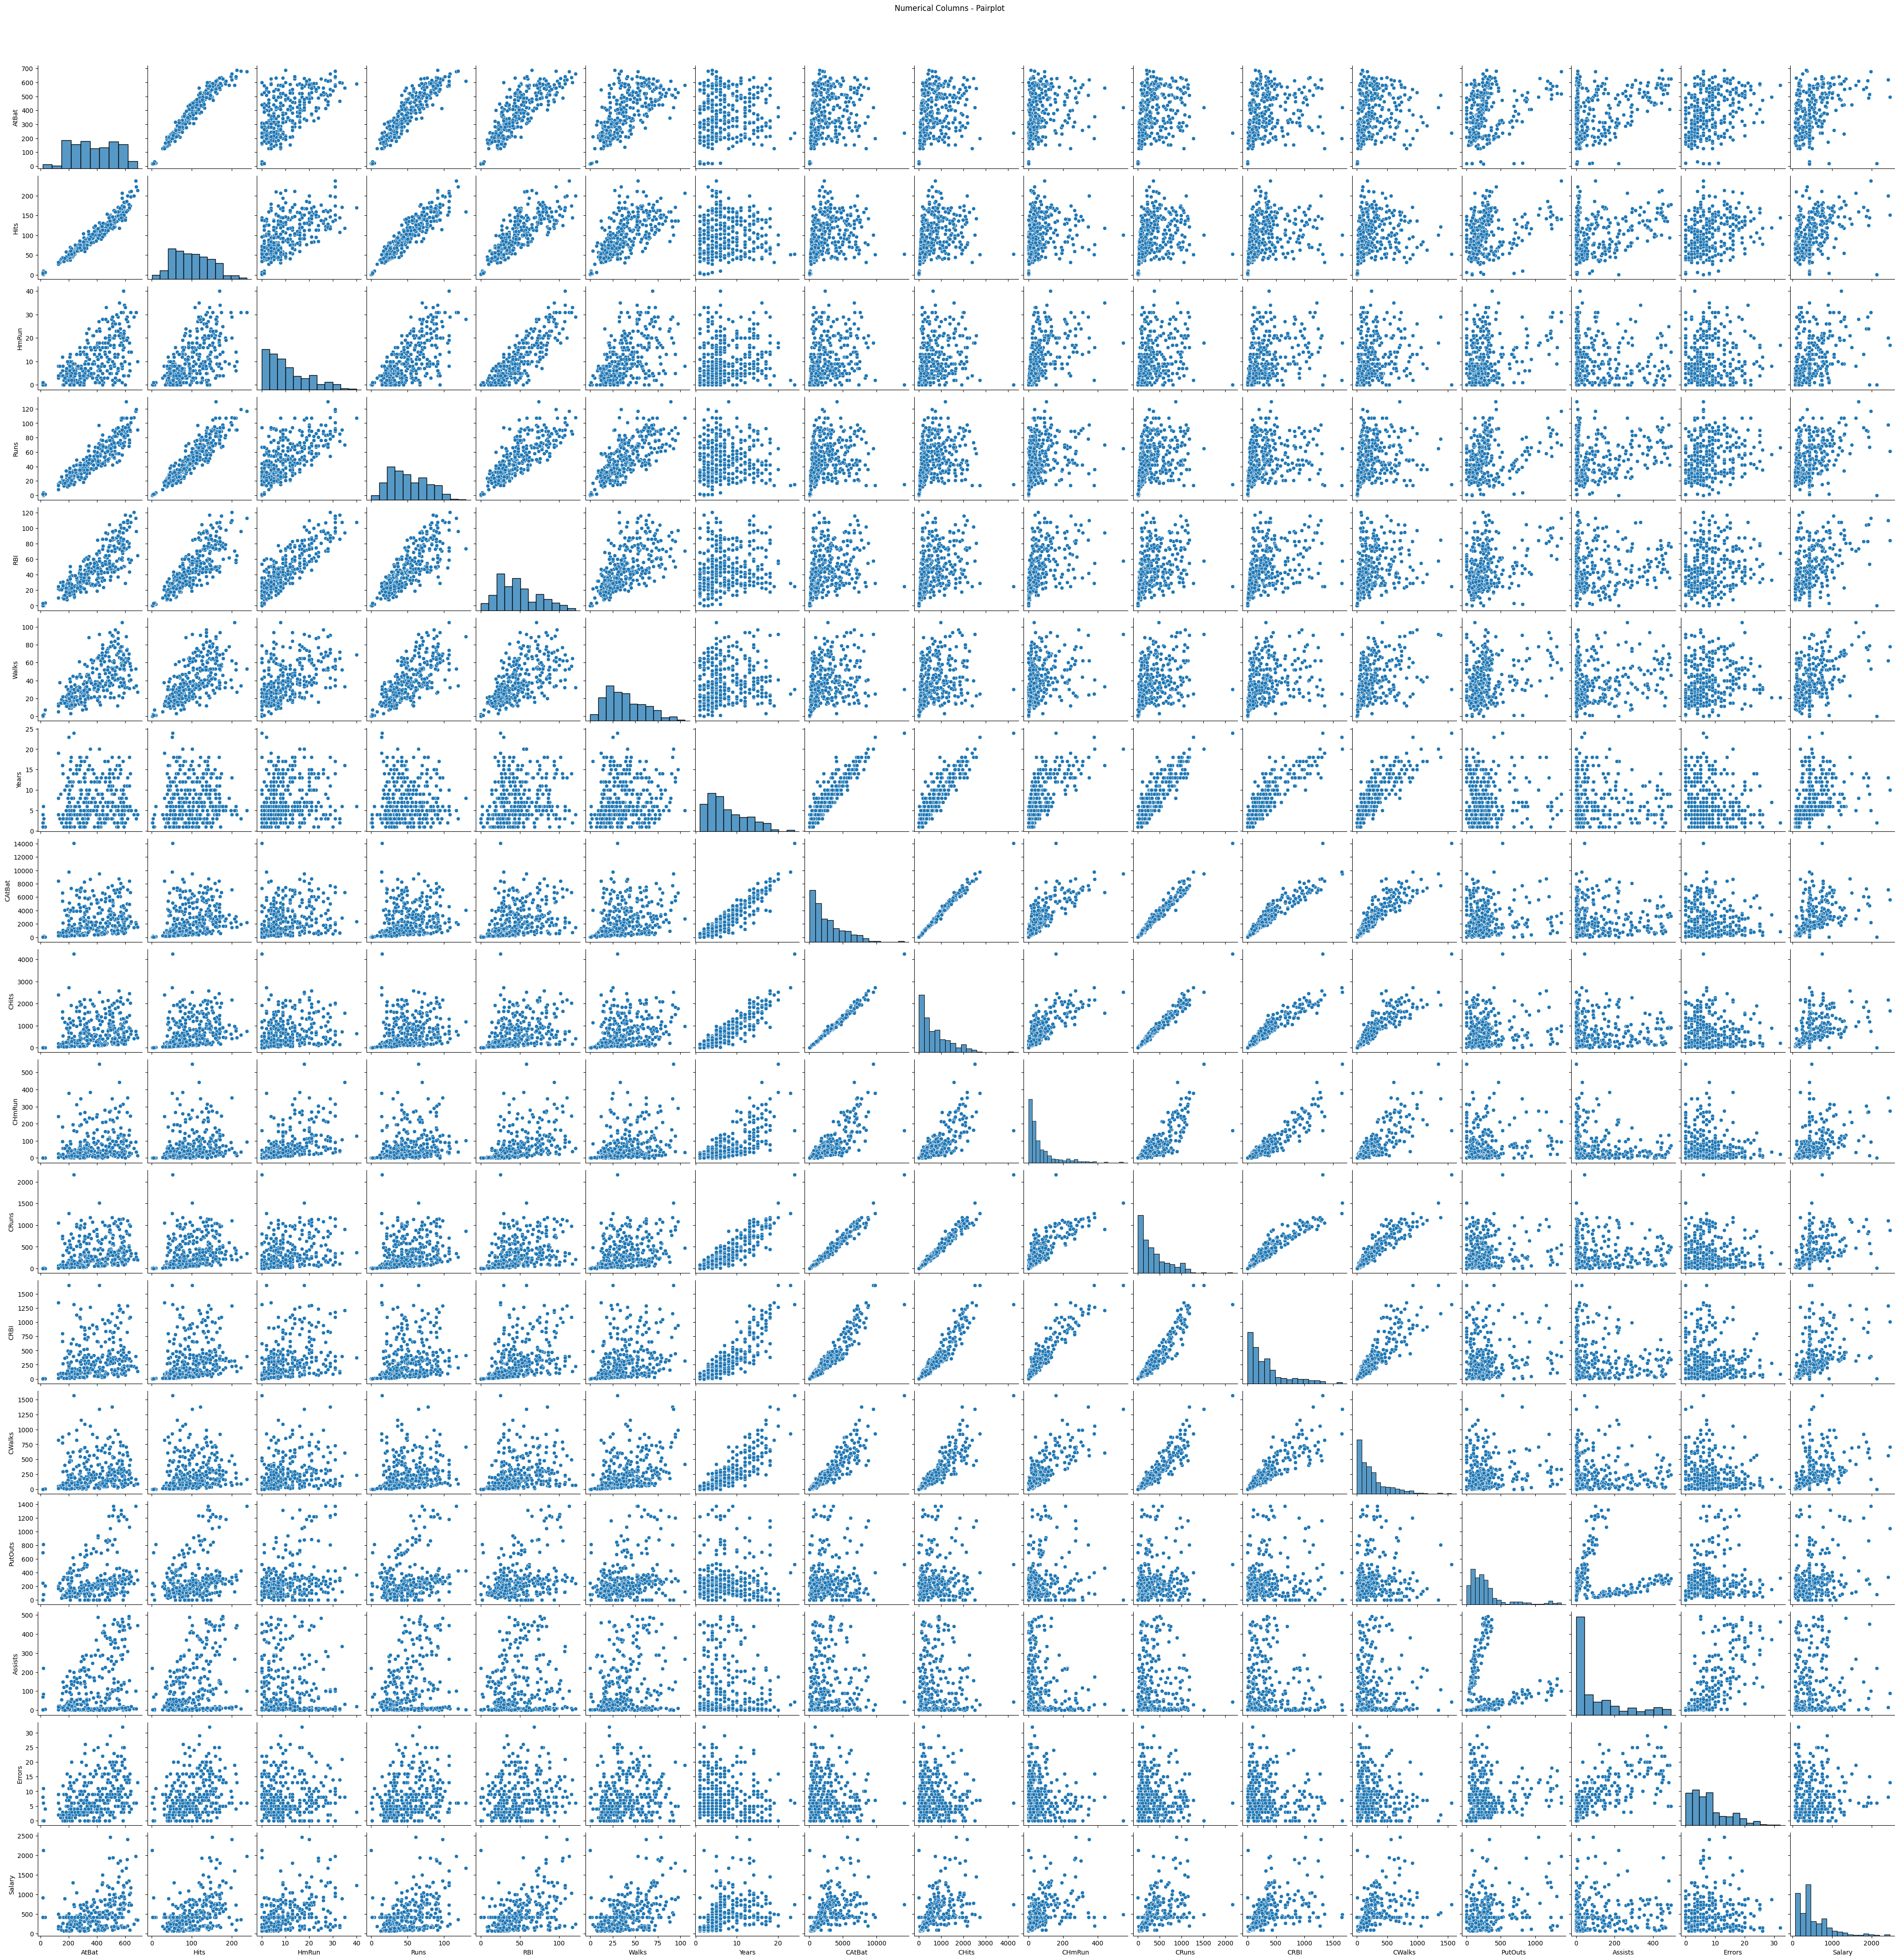

<Figure size 4000x3000 with 0 Axes>

In [10]:
plot_df(df)

### Conclusion
- **Pie chart:**
  - Our categorical columns are very well distributed.
  - we will drop Unnamed: 0
- **Boxplot:**
  - Many of our numerical columns have outliers so we will have to handle outliers.
- **Histplot:**
  - Our data is mostly right skewed so we will also have normalise the data using scaling before training models.
- **Pairplot**
  - Atbat and Hits, CAtBat and CHits are very positively correlated with each other.
  - Atbat and Hits, CAtBat and CHits are also very positively correlated with Runs and CRuns respectively which makes sense because all 3 are events that happen with causality like hit is counted if ball touches the bat, and most hit can get you Runs.
  - Most of the other are somewhat positively correlated with each other.
  - So we will drop AtBat and Hits because that will introduce MultiColinearity.

## Target Feature Analysis - Salary

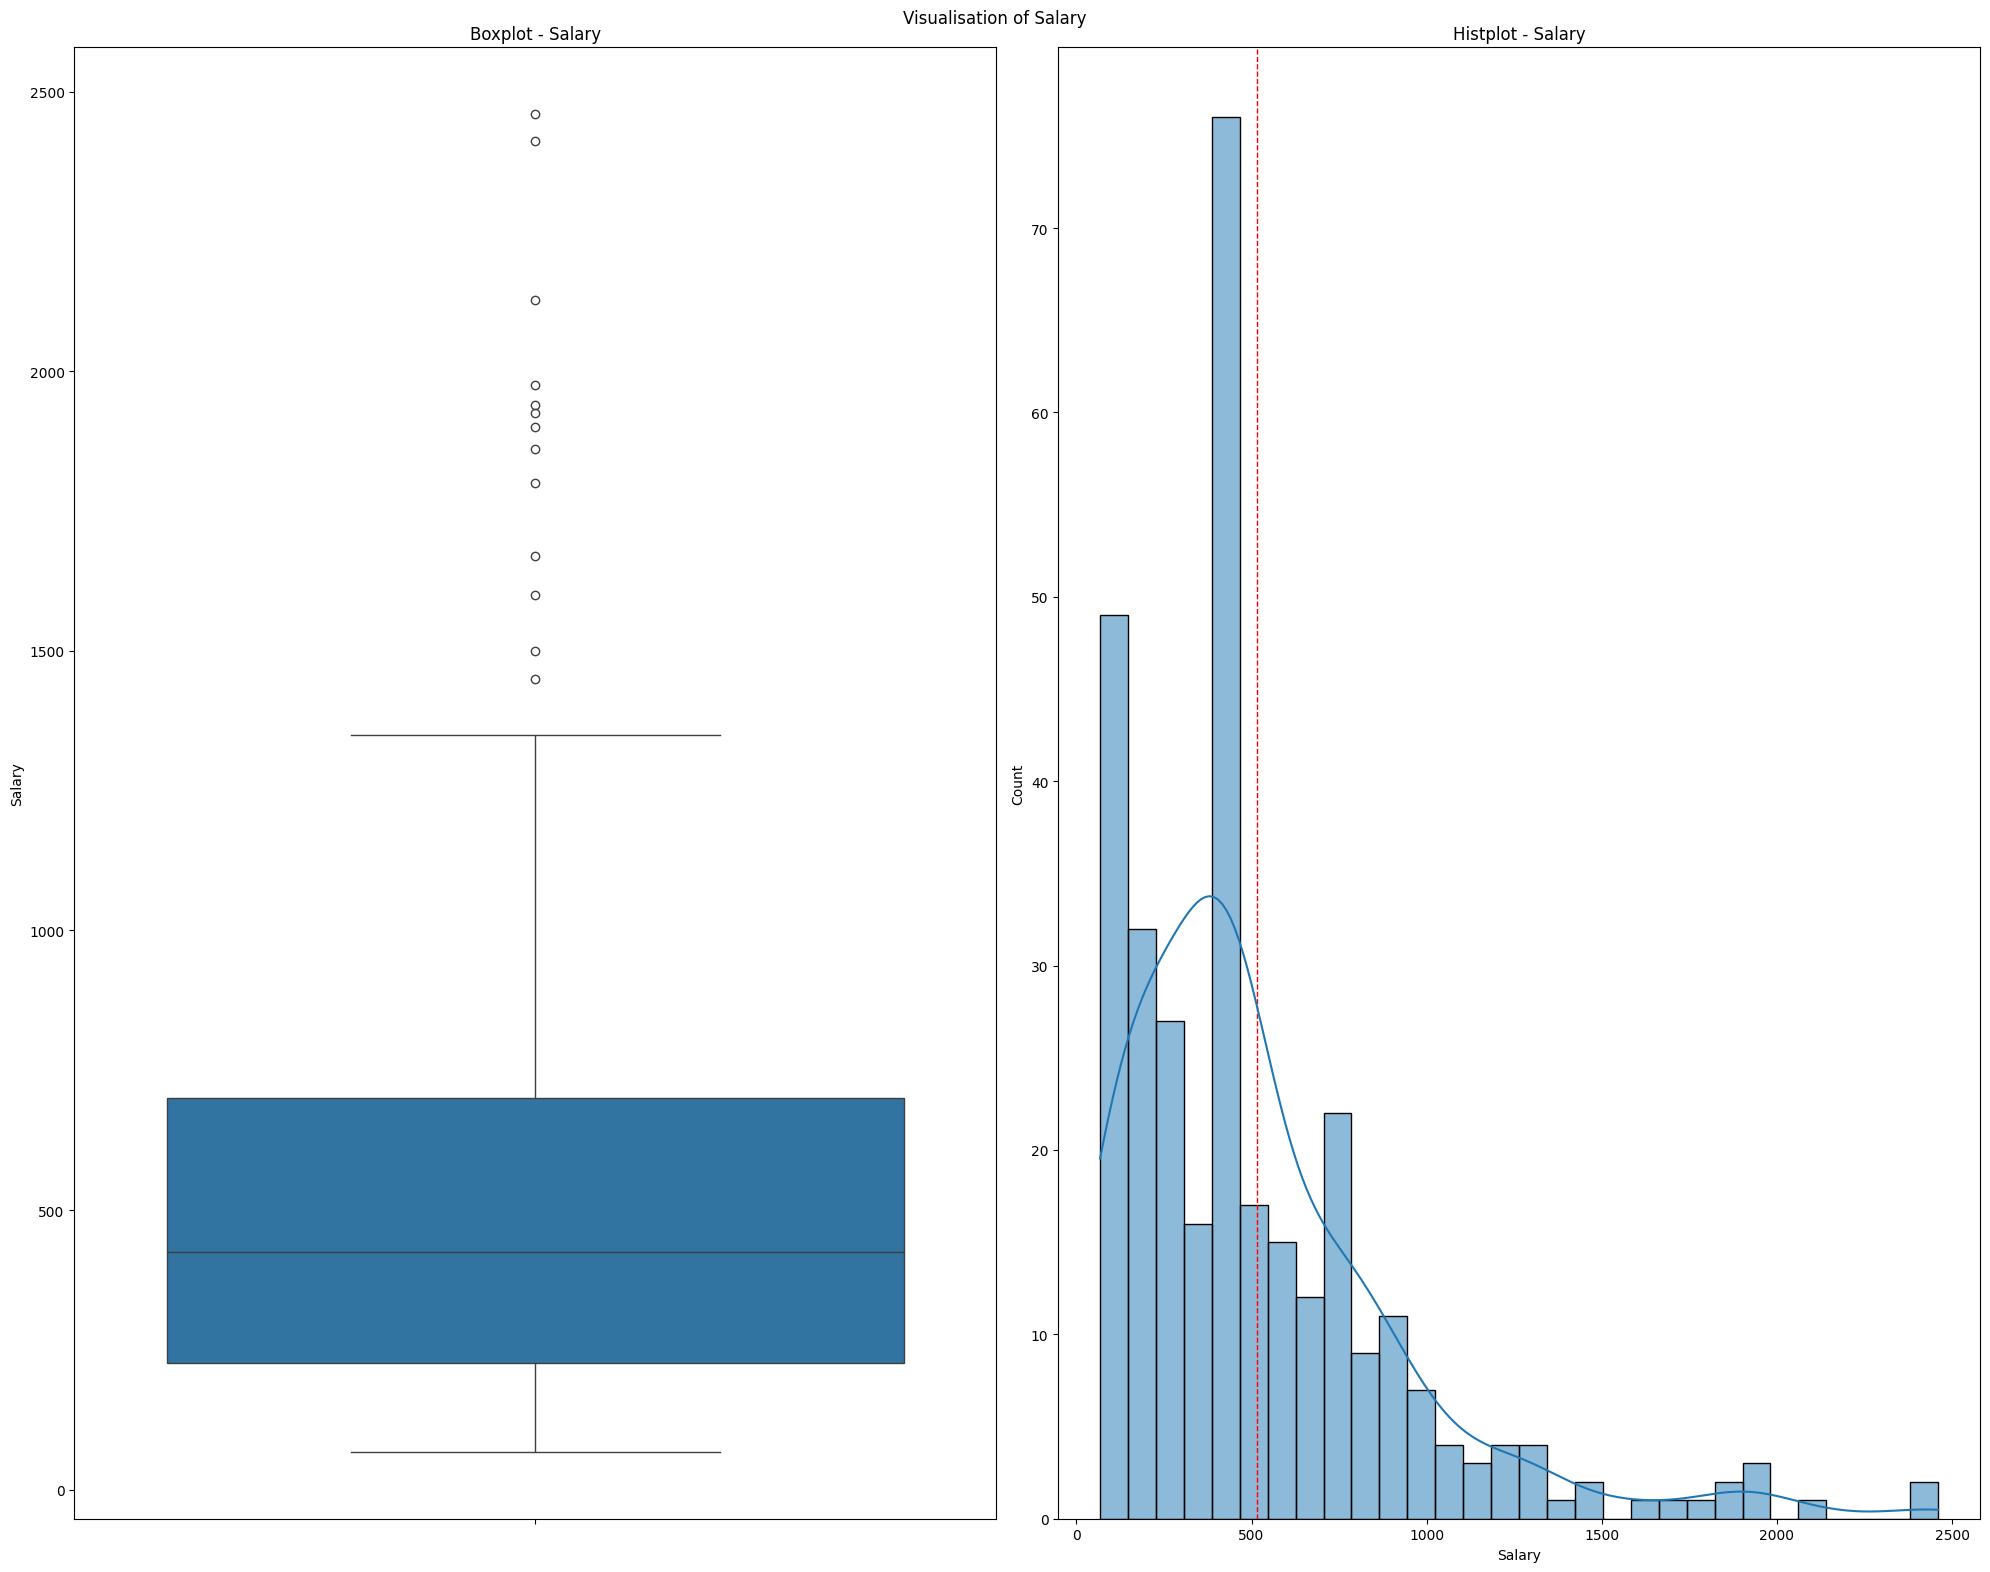

In [11]:
target_feature = "Salary"

plt.figure(figsize=(20, 16))

plt.subplot(1,2,1)
plt.title(f"Boxplot - {target_feature}")
sns.boxplot(df[target_feature])

plt.subplot(1,2,2)
plt.title(f"Histplot - {target_feature}")
plt.axvline(df[target_feature].mean(), color="r", linestyle="dashed", linewidth=1)
sns.histplot(df[target_feature].dropna(), kde=True, bins=30)

plt.suptitle(f"Visualisation of {target_feature}")
plt.tight_layout()
plt.show()

### Conclusion

Our target feature is **Salary**

- **Boxplot:**
  - Our target feature salary has some outliers, so we will handle them before building the pipeline
- **Histplot:**
  - Our histplot is right skewed.
  - meaning our data has more people with more than mean salary which seems to be somewhere about 600 salary.

In [12]:
df_c = df.copy(deep=True)

In [13]:
Q1 = df_c[target_feature].quantile(0.25)
Q3 = df_c[target_feature].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_c[target_feature] = np.clip(df_c[target_feature], lower_bound, upper_bound)

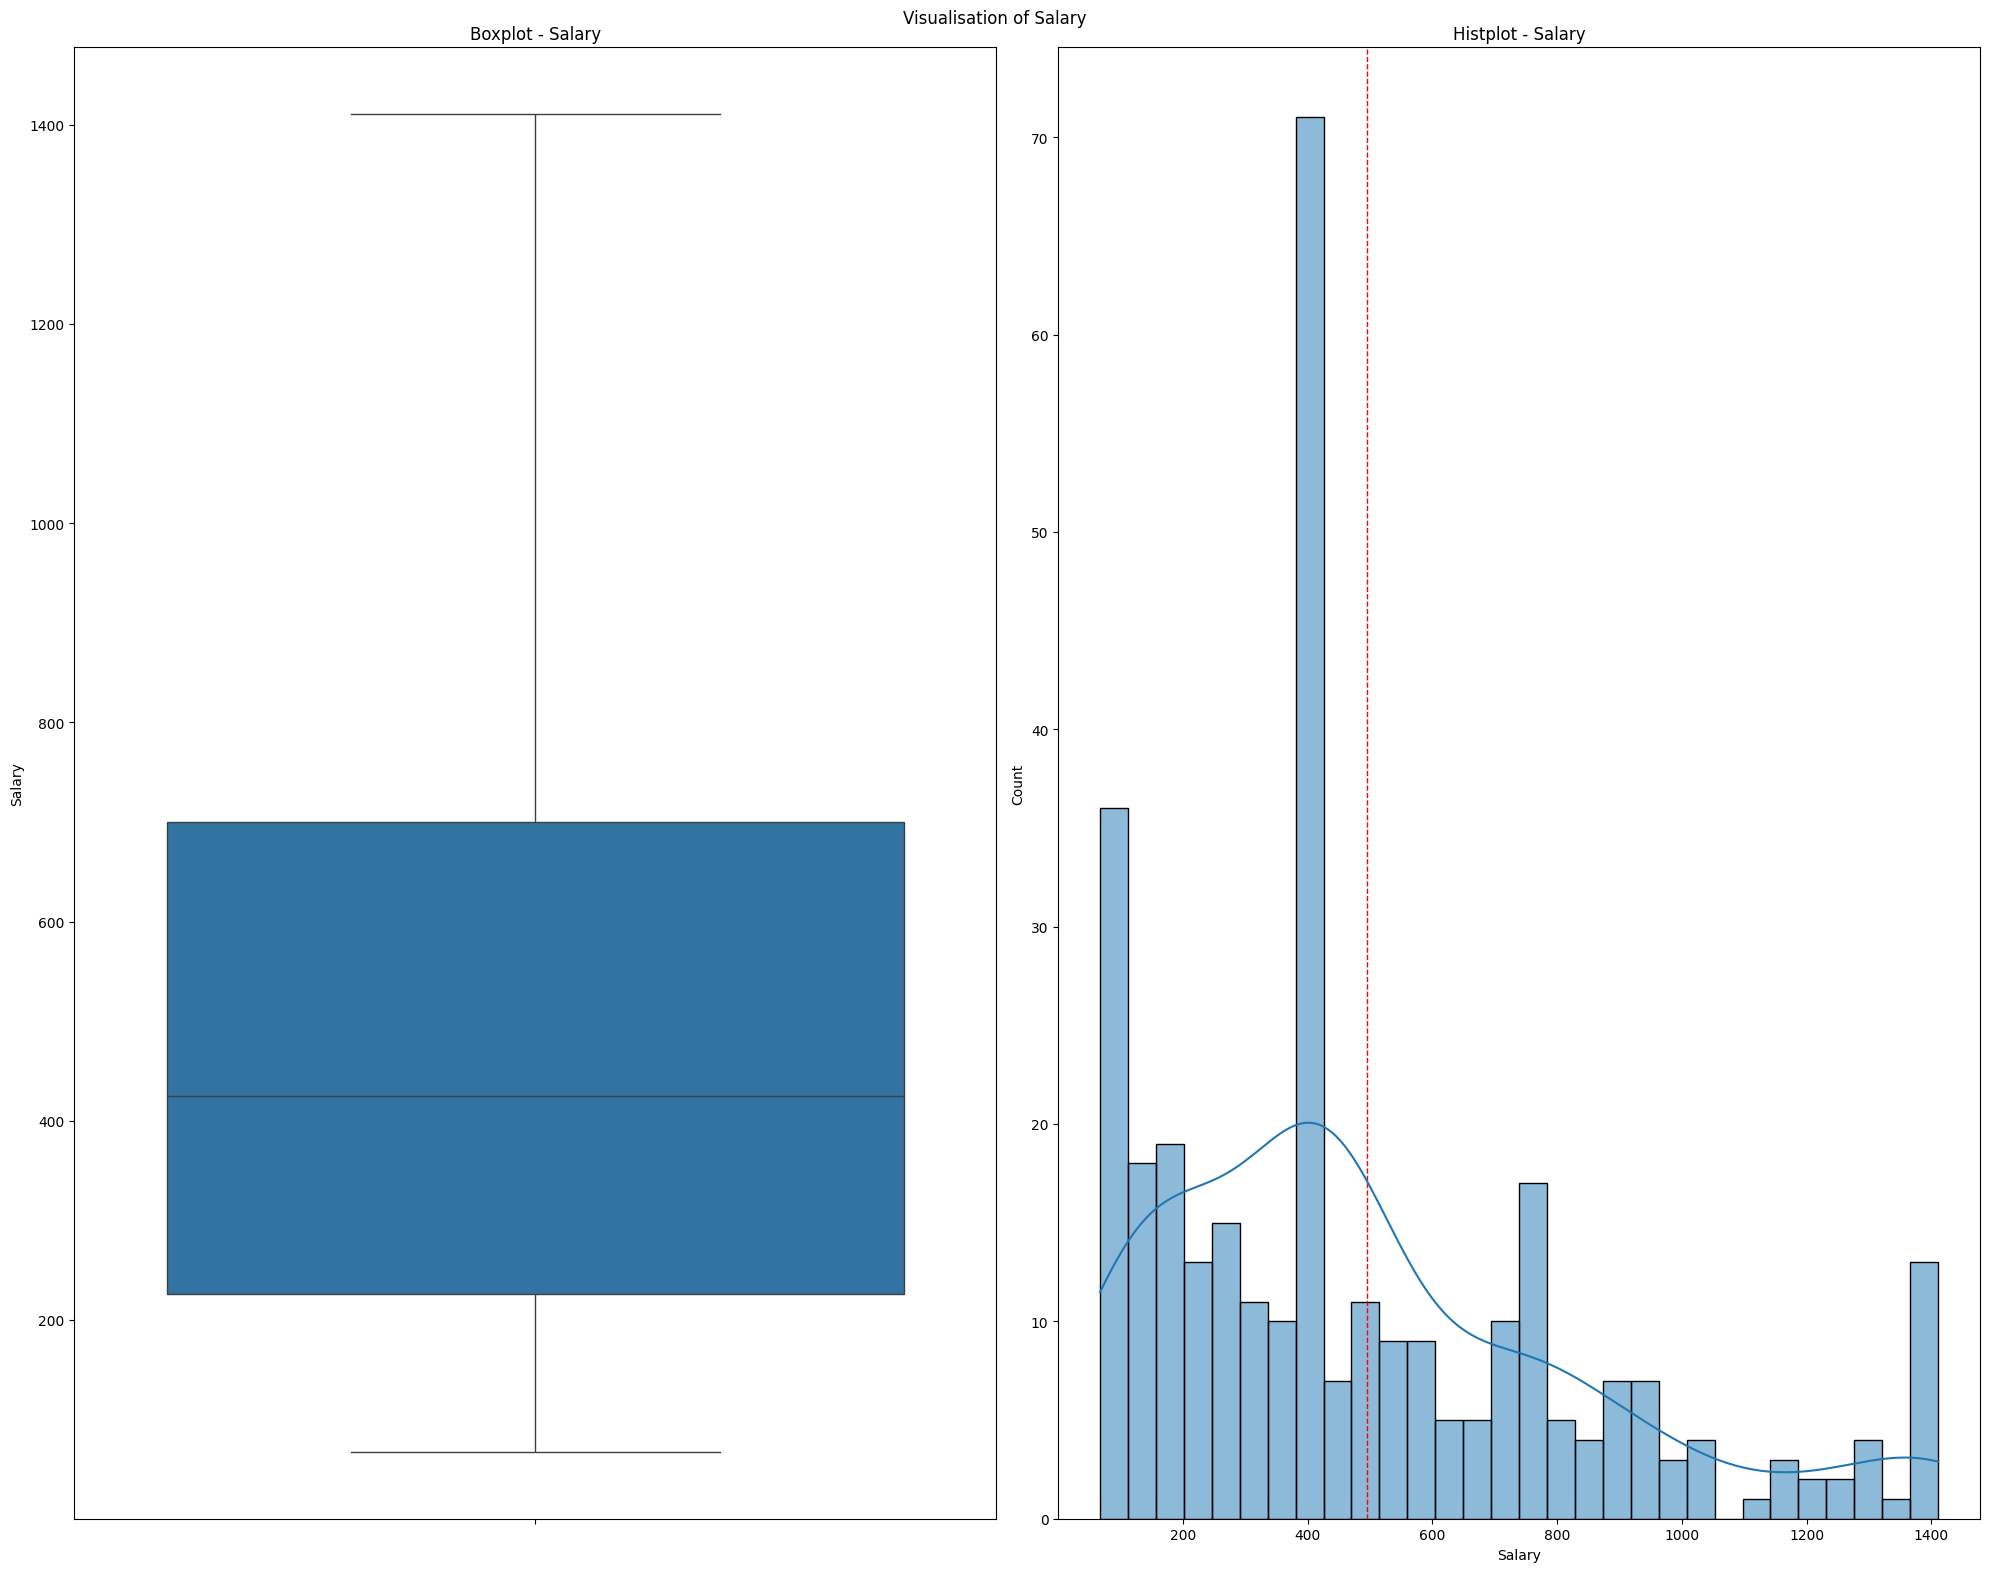

In [14]:
target_feature = "Salary"

plt.figure(figsize=(20, 16))

plt.subplot(1, 2, 1)
plt.title(f"Boxplot - {target_feature}")
sns.boxplot(df_c[target_feature])

plt.subplot(1, 2, 2)
plt.title(f"Histplot - {target_feature}")
plt.axvline(df_c[target_feature].mean(), color="r", linestyle="dashed", linewidth=1)
sns.histplot(df_c[target_feature].dropna(), kde=True, bins=30)

plt.suptitle(f"Visualisation of {target_feature}")
plt.tight_layout()
plt.show()

We have removed the outliers now

## Feature Selection

In [15]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  322 non-null    object 
 1   AtBat       322 non-null    int64  
 2   Hits        322 non-null    int64  
 3   HmRun       322 non-null    int64  
 4   Runs        322 non-null    int64  
 5   RBI         322 non-null    int64  
 6   Walks       322 non-null    int64  
 7   Years       322 non-null    int64  
 8   CAtBat      322 non-null    int64  
 9   CHits       322 non-null    int64  
 10  CHmRun      322 non-null    int64  
 11  CRuns       322 non-null    int64  
 12  CRBI        322 non-null    int64  
 13  CWalks      322 non-null    int64  
 14  League      322 non-null    object 
 15  Division    322 non-null    object 
 16  PutOuts     322 non-null    int64  
 17  Assists     322 non-null    int64  
 18  Errors      322 non-null    int64  
 19  Salary      322 non-null    f

In [16]:
columns_to_drop = ["AtBat", "Hits", "Unnamed: 0", "CAtBat", "CHits"]
df_c = df_c.drop(columns=columns_to_drop, axis=1)
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   HmRun      322 non-null    int64  
 1   Runs       322 non-null    int64  
 2   RBI        322 non-null    int64  
 3   Walks      322 non-null    int64  
 4   Years      322 non-null    int64  
 5   CHmRun     322 non-null    int64  
 6   CRuns      322 non-null    int64  
 7   CRBI       322 non-null    int64  
 8   CWalks     322 non-null    int64  
 9   League     322 non-null    object 
 10  Division   322 non-null    object 
 11  PutOuts    322 non-null    int64  
 12  Assists    322 non-null    int64  
 13  Errors     322 non-null    int64  
 14  Salary     322 non-null    float64
 15  NewLeague  322 non-null    object 
dtypes: float64(1), int64(12), object(3)
memory usage: 40.4+ KB


In [17]:
X = df_c.drop("Salary", axis = 1)
y = df_c["Salary"]

print(f"X Shape: {X.shape}")
print(f"y Shape: {y.shape}")

X Shape: (322, 15)
y Shape: (322,)


## Pipeline Preparations

In [19]:
class OutliersClipper(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.bounds_ = {}

        num_cols = X.select_dtypes(include="number").columns
        for col in num_cols:
            Q1 = X[col].quantile(0.25)
            Q3 = X[col].quantile(0.75)
            IQR = Q3 - Q1

            low = Q1 - 1.5 * IQR
            high = Q3 + 1.5 * IQR

            self.bounds_[col] = (low, high)

        return self

    def transform(self, X):
        X = X.copy()

        for col, bounds in self.bounds_.items():
            if col not in X.columns:
                continue

            low, high = bounds
            X[col] = np.clip(X[col], low, high)

        return X

In [20]:
preprocessor = ColumnTransformer(
    transformers=[
        (
            "num",
            StandardScaler(),
            make_column_selector(dtype_include=["number", "float64", "int64"]),
        ),
        (
            "cat",
            OneHotEncoder(drop="first", handle_unknown="ignore"),
            make_column_selector(dtype_include="object"),
        ),
    ]
)

## Splitting the data

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, test_size=0.2
)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (257, 15)
y_train shape: (257,)
X_test shape: (65, 15)
y_test shape: (65,)


## Decision Tree

In [23]:
dt_pipeline = Pipeline(
    steps=[
        ("Outlier Clipper", OutliersClipper()),
        ("Preprocessing", preprocessor),
        ("Model", DecisionTreeRegressor()),
    ]
)

dt_pipeline.fit(X_train, y_train)
dt_pipeline

Pipeline(steps=[('Outlier Clipper', OutliersClipper()),
                ('Preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000020F491085F0>),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000020F0EBEAC30>)])),
                ('Model', DecisionTreeRegressor())])

In [24]:
y_pred_dt = dt_pipeline.predict(X_test)

rmse_dt = root_mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"RMSE: {rmse_dt}")
print(f"R2: {r2_dt}")

RMSE: 322.16757896127484
R2: 0.10223595028627663


## Random Forest

In [26]:
rf_pipeline = Pipeline(
    steps=[
        ("Outlier Clipping", OutliersClipper()),
        ("Preprocessing", preprocessor),
        ("Model", RandomForestRegressor(random_state=42)),
    ]
)

rf_pipeline.fit(X_train, y_train)
rf_pipeline

Pipeline(steps=[('Outlier Clipping', OutliersClipper()),
                ('Preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000020F491085F0>),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000020F0EBEAC30>)])),
                ('Model', RandomForestRegressor(random_state=42))])

In [28]:
y_pred_rf = rf_pipeline.predict(X_test)

rmse_rf = root_mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"RMSE: {rmse_rf}")
print(f"R2: {r2_rf}")

RMSE: 220.879066707352
R2: 0.5780046546476998


## Conclusion

Random forest is the better model here because it can captures 58% of variance and only have error of 220 as compared to 10% variance capture and 322 error of Decision tree